In [42]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 589, in __init__
    self[name] = toklist[0]
TypeError: 'int' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as data

### **LOADING THE DATA**

In [44]:
start = '2010-01-01'
end = '2020-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464117


In [45]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.620911
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.292679
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.491241
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.353027
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.333542


### **RESETTING THE INDEX VALUE**

In [46]:
# TO RESET INDEX, WE WILL REMOVE DATE AND ADJ CLOSE COLUMN

df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464117


In [47]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


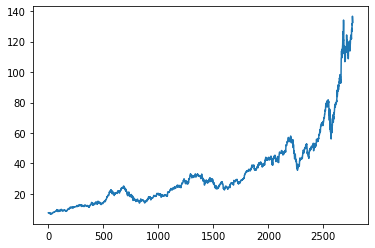

In [48]:
plt.plot(df['Close'])
plt.show()

### **CREATING MOVING AVERAGES**

In [49]:
# WHILE CREATING MVs (MOVING AVERAGES) FOR X DAYS, IT WILL START FROM X+1 DAYS

# THAT IS, FOR 100 DAYS MOVING AVERAGE, IT WILL SHOW NULL FOR FIRST 100 VALUES, 
#   BUT FOR 101th DATA, IT WILL BE AVERAGE OF PREVIOUS 100 DAYS ie (1-100)
#   SIMILARLY, FOR 102th DATA, IT WILL BE AVERAGE OF PREVIOUS 100 DAYS ie (2-101),
#   AND SO ON

In [50]:
MA100 = df['Close'].rolling(100).mean()

In [51]:
MA100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
2768    119.125175
Name: Close, Length: 2769, dtype: float64

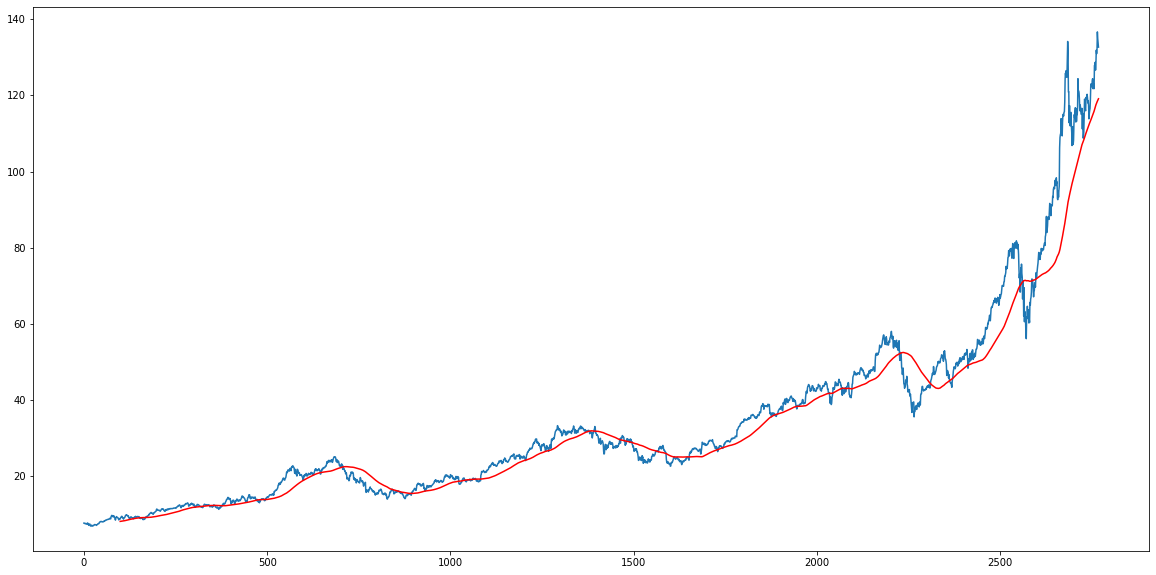

In [52]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'])
plt.plot(MA100, color='r')
plt.show()

In [53]:
MA200 = df['Close'].rolling(200).mean()
MA200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
2768    100.573950
Name: Close, Length: 2769, dtype: float64

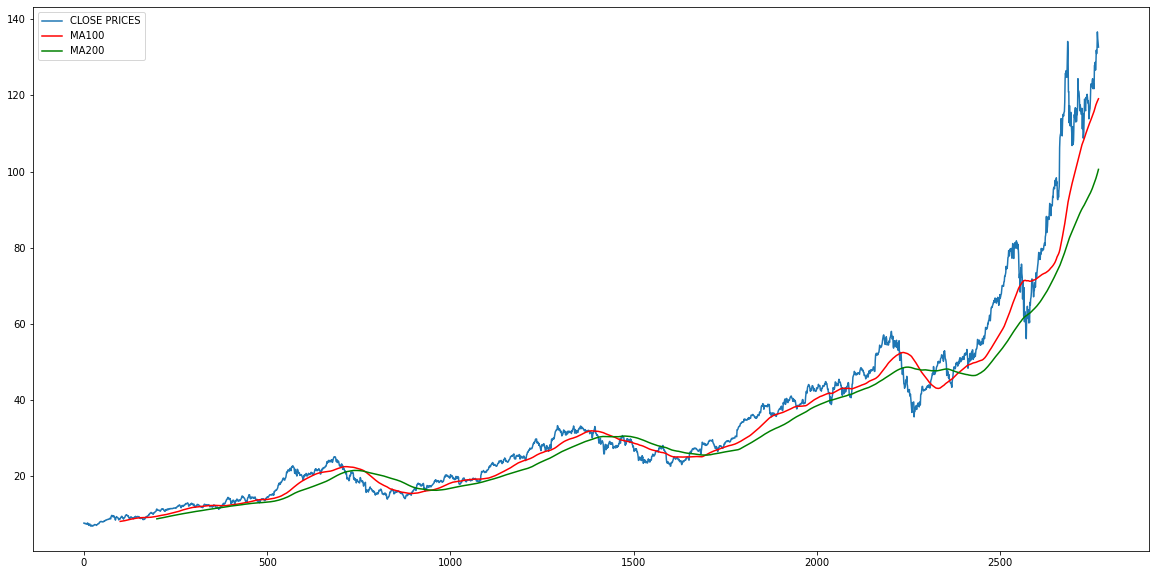

In [54]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'])
plt.plot(MA100, color='r')
plt.plot(MA200, color='g')
plt.legend(['CLOSE PRICES','MA100','MA200'])
plt.show()

In [55]:
df.shape

(2769, 5)

### **SPLITTING THE DATASET**

In [56]:
split = int(len(df)*0.70)

train_df = pd.DataFrame(df['Close'][:split])
test_df = pd.DataFrame(df['Close'][split:])

In [57]:
train_df

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
1933,40.314999
1934,39.657501
1935,40.375000
1936,40.215000


In [58]:
test_df

,Close
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499
1942,39.017502
...,...
2764,131.970001
2765,136.690002
2766,134.869995
2767,133.720001


### **SCALING THE VALUES**

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scalar = MinMaxScaler(feature_range=(0,1))

In [61]:
train_df_arr = scalar.fit_transform(train_df)
train_df_arr

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.98133429],
       [0.97664957],
       [0.96779247]])

### **MAKING TRAINING DATASET**

In [62]:
train_df_arr.shape

(1938, 1)

In [63]:
X_train = []
Y_train = []

for i in range(100, train_df_arr.shape[0]):
    X_train.append(train_df_arr[i-100:i])
    Y_train.append(train_df_arr[i,0])

# X_train[:5]
# Y_train[:5]

In [64]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [65]:
print(X_train.shape)
print(Y_train.shape)

(1838, 100, 1)
(1838,)


### **BUILDING A NEURAL NETWORK**

In [66]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [67]:
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    
    LSTM(500, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(1000, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(500, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(100, activation='relu'),
    Dropout(0.2),

    Dense(1)
])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_5 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 500)          1202000   
                                                                 
 dropout_6 (Dropout)         (None, 100, 500)          0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 1000)         6004000   
                                                                 
 dropout_7 (Dropout)         (None, 100, 1000)         0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 500)         

### **FITTING THE TRAINING DATA**

In [69]:
model.compile(optimizer='adam', loss='mean_squared_error')
h = model.fit(X_train, Y_train, epochs = 25)

Epoch 1/25
 2/58 [>.............................] - ETA: 1:08 - loss: 0.1993

KeyboardInterrupt: ignored

In [ ]:
plt.plot(h.history['loss'])
plt.show()

### **CREATING THE TESTING DATASET**

In [ ]:
# GETTING THE LAST 100 OF TRAINING DATA TO PREDICT START 100 OF TESTING DATA

In [ ]:
past100_df = train_df.tail(100)

In [ ]:
test_df = past100_df.append(test_df, ignore_index=True)

In [ ]:
test_df_arr = scalar.fit_transform(test_df)
test_df_arr.shape

In [ ]:
X_test = []
Y_test = []

for i in range(100, test_df_arr.shape[0]):
    X_test.append(test_df_arr[i-100:i])
    Y_test.append(test_df_arr[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
print(X_test.shape)
print(Y_test.shape)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred.shape

In [ ]:
scalar.scale_

In [ ]:
scale = scalar.scale_[0]
Y_test = Y_test / scale
Y_pred = Y_pred / scale

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(Y_test, color='b', label='Original')
plt.plot(Y_pred, color='r', label='Predicted')
plt.show()

In [ ]:
model.save('model.h5')